### Importing and Merging Data
<p style='text-align: right;'> 4 points</p>


In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np


In [2]:
# Importing all datasets
churn_data = pd.read_csv('churn_data-1.csv')
customer_data =pd.read_csv('customer_data-1.csv')
internet_data = pd.read_csv('internet_data-1.csv')

In [3]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = pd.merge(churn_data, customer_data, how = 'inner', on = 'customerID')

In [4]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1, internet_data, how = 'inner', on = 'customerID')

### Let's understand the structure of our dataframe
<p style='text-align: right;'> 3 points</p>


In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Preparation
<p style='text-align: right;'> 10 points</p>


In [8]:
# Converting Yes to 1 and No to 0 using map
mapped = {'Yes' : 1, 'No' : 0}

telecom['PhoneService'] = telecom['PhoneService'].map(mapped)
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map(mapped)
telecom['Churn'] =telecom['Churn'].map(mapped)  
telecom['Partner'] = telecom['Partner'].map(mapped)
telecom['Dependents'] = telecom['Dependents'].map(mapped)

### Dummy Variable Creation



In [9]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'], prefix='Contract', drop_first=True) 
#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom, cont], axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'], prefix= 'PaymentMethod', drop_first=True) 
#Adding the results to the master dataframe
telecom = pd.concat([telecom, pm], axis=1)

# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'], prefix= 'gender', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, gen], axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'], prefix= 'MultipleLines', drop_first=True)
#  dropping MultipleLines_No phone service column from ml
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ml1], axis=1)

# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'], prefix= 'InternetService', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, iser], axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix= 'OnlineSecurity', drop_first=True)
#drop OnlineSecurity_No internet service column from os
os1= os.drop(['OnlineSecurity_No internet service'], 1)
#Adding os1 to the master dataframe
telecom = pd.concat([telecom, os1], axis=1)

# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob =pd.get_dummies(telecom['OnlineBackup'], prefix= 'OnlineBackup', drop_first=True)
#dropping OnlineBackup_No internet service from ob
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
#Adding the results(ob1) to the master dataframe
telecom =  pd.concat([telecom, ob1], axis=1 )

# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp =pd.get_dummies(telecom['DeviceProtection'], prefix= 'DeviceProtection', drop_first=True)
#dropping DeviceProtection_No internet service from dp
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom, dp1], axis=1)

# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'], prefix= 'TechSupport', drop_first=True)
#dropping TechSupport_No internet service from ts
ts1 = ts.drop(['TechSupport_No internet service'], 1)
#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom, ts1], axis=1)

# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'], prefix= 'StreamingTV', drop_first=True)
#dropping StreamingTV_No internet service from st
st1 = st.drop(['StreamingTV_No internet service'], 1)
#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom, st1], axis=1)

# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix= 'StreamingMovies', drop_first=True)
#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom, sm1], axis=1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_12944/2270008906.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  os1= os.drop(['OnlineSecurity_No internet service'], 1)
C:\Users\Admin\AppData\Local\Temp/ipykernel_12944/2270008906.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
C:\Users\Admin\AppData\Local\Temp/ipykernel_12944/2270008906.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
C:\Users\Admin\AppData\Local\Temp/ipykernel_12944/2270008906.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ts1 = ts.drop(['TechSuppor

### Dropping the repeated variables

Since We have already created dummies for the below variables
    
    
so we can drop them off as they are now repeated in our master dataset


In [10]:
# drop all duplicate columns
telecom = telecom.drop(['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection',
'TechSupport', 
'StreamingTV', 
'StreamingMovies'], axis=1)

In [11]:
telecom.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [12]:

# convert to numeric
telecom['TotalCharges']= pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [13]:
# again check data type informationof our master dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers
<p style='text-align: right;'> 4 points</p>


Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [14]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[[ 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [15]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles = [.25, .50, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

<p style='text-align: right;'> 5 points</p>


In [16]:
# Checking total missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                 

In [17]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_Yes                         0.00
DeviceProtection_Yes              

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [18]:
# Removing NaN form TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [19]:
# Lets Check percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_Yes                         0.0
DeviceProtection_Yes                     0.0
TechSuppor

Now we don't have any missing values

### Feature Standardisation

<p style='text-align: right;'> 6 points</p>




In [20]:
# Get telecom data type information
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [21]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [22]:
# Standardising above continuous features

std_df = (df-df.mean())/df.std()  # formula for standardising

In [23]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(['tenure', 'MonthlyCharges', 'TotalCharges'],axis = 1)

In [24]:
# Add std_df into telecom
telecom = pd.concat([telecom, std_df], axis = 1)

In [25]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,0,1,0,1,1,1,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,0,0,1,1,0,1,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1.368012,1.357835,2.012201


### Checking the Churn Rate

<p style='text-align: right;'> 2 points</p>


In [26]:
#caluclating total churn percentage in our master dataframe
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [27]:
# print churn
print(churn)

26.578498293515356


We have almost 27% churn rate

## Model Building

<p style='text-align: right;'> 11 points</p>

In [28]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['Churn', 'customerID'], axis=1)

# Putting response variable to y
y = telecom['Churn']

In [29]:
# print y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Running Your First Training Model

In [30]:
# import statsmodels api as sm

import statsmodels.api as sm

### Splitting Data into Training and Test Sets

In [31]:
# import train_test_split module
from sklearn.model_selection import train_test_split

In [32]:
# adding constant to X
X= sm.add_constant(X)
# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# Logistic regression model
logm1 = sm.Logit(y_train, X_train)

#fitting and printing summary
logm1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.2912
Time:                        21:34:17   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

From above you can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Let's drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.
    

In [37]:
# drop above features from X
X.drop(['PhoneService', 'Partner', 'Dependents', 'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes'], axis = 1, inplace = True)


### Correlation Matrix

<p style='text-align: right;'> 2 points</p>


In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns



<AxesSubplot:>

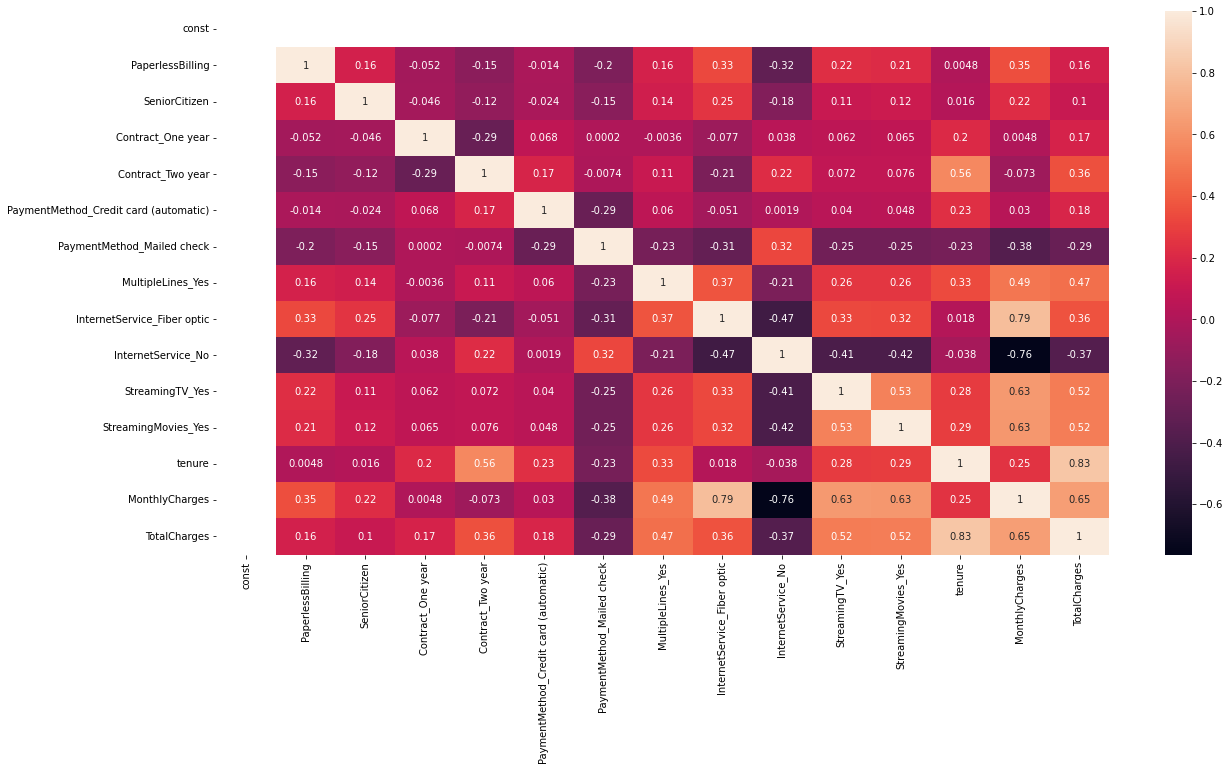

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(), annot=True)

### Dropping highly correlated variables.

<p style='text-align: right;'> 4 points</p>




In [42]:
# Write a correlation function to drop correllation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    col_corr = set() #Set all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  #getting the name of column
                col_corr.add(colname)
                
                
                
        
    
    
    
    
    return col_corr

In [43]:
#get correlation function output with dataset as X and threshold as 0.7
corr_features = correlation(X, 0.7)

# print length of corr_features
len(set(corr_features))

2

In [44]:
#print corr_features
corr_features


{'MonthlyCharges', 'TotalCharges'}

In [45]:
# Lets drop the above variables from X
X.drop(['MonthlyCharges', 'TotalCharges'], axis =1, inplace = True)


## Dropping Variable with high VIF

<p style='text-align: right;'> 5 points</p>


 

In [46]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empty dataframe
vif= pd.DataFrame()

#variables names with all variables in column X
vif["variables"] = X.columns

# Vif scores for corresponding features
vif["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]

In [116]:
# print vif
vif.sort_values(by='VIF')

,variables,VIF
2,SeniorCitizen,1.10
5,PaymentMethod_Credit card (automatic),1.16
1,PaperlessBilling,1.20
7,MultipleLines_Yes,1.33
6,PaymentMethod_Mailed check,1.36
3,Contract_One year,1.57
10,StreamingTV_Yes,1.59
11,StreamingMovies_Yes,1.59
8,InternetService_Fiber optic,1.65
9,InternetService_No,1.66


# No Variables with high VIF

### Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

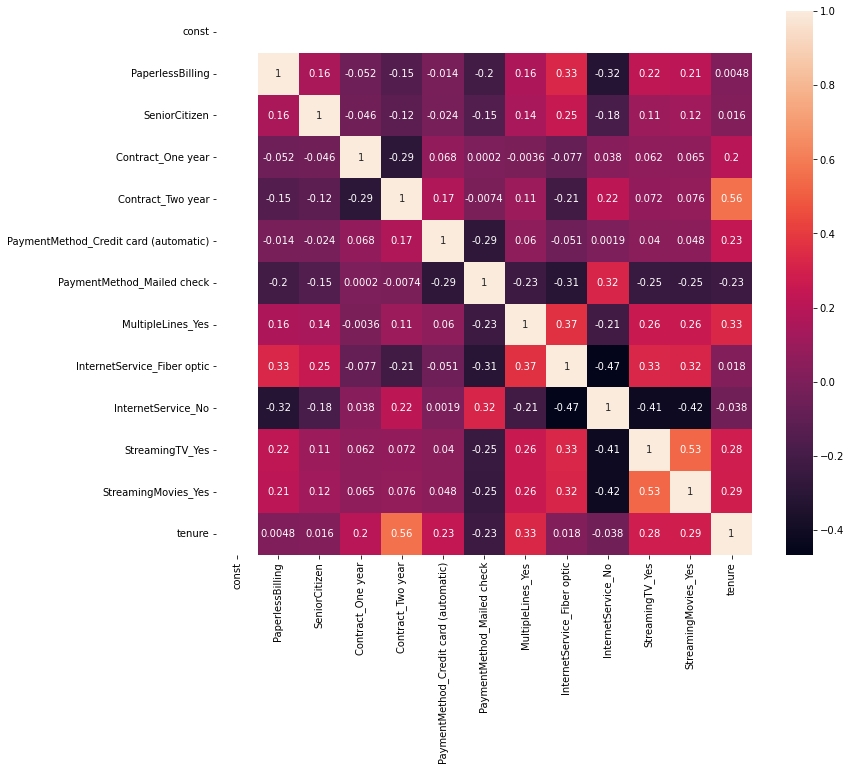

In [49]:
#plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot = True)


### Re-Running the Model

<p style='text-align: right;'> 3 points</p>


In [50]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# building model again
logm2 = sm.Logit(y_train, X_train)

#fitting model and printing summary

logm2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.413269
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           12
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.2808
Time:                        10:59:34   Log-Likelihood:                -2034.1
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7661      0.123    -14.305      0.000      -2.008      -1.524
PaperlessBilling                          0.3424      0.089      3.855      0.000       0.168       0.516
SeniorCitizen                             0.4882      0.099      4.920      0.000       0.294       0.683
Contract_One year                        -0.7731      0.126     -6.150      0.000      -1.020      -0.527
Contract_Two year                        -1.4228      0.206     -6.905      0.000      -1.827      -1.019
PaymentMethod_Credit card (automatic)    -0.3988      0.112     -3.553      0.000      -0.619      -0.179
PaymentMethod_Mailed check               -0.3593      0.109     -3.297      0.001      -0.573      -0.146
MultipleLines_Yes                         0.2112      0.092      2.302      0.021       0.031       0.391
InternetService_Fiber optic               0.8602      0.096      8.941      0.000       0.672       1.049
InternetService_No                       -0.8443      0.152     -5.544      0.000      -1.143      -0.546
StreamingTV_Yes                           0.3162      0.093      3.395      0.001       0.134       0.499
StreamingMovies_Yes                       0.2169      0.093      2.334      0.020       0.035       0.399
tenure                                   -0.9686      0.065    -14.908      0.000      -1.096      -0.841
=========================================================================================================
"""

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### Feature Selection Using RFE

<p style='text-align: right;'> 5 points</p>


Lets do feature selection using LogisticRegression with RFE

In [51]:
# import RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Initiate LogisticRegression()
logreg = LogisticRegression()

 # Initialise RFE 
rfe = RFE(logreg)      

# fitting RFE 
rfe = rfe.fit(X, y)

# Printing the boolean results
print(rfe.support_)     
# Printing the ranking
print(rfe.ranking_)           

[False  True False  True  True False False False  True  True False False
  True]
[8 1 3 1 1 4 5 7 1 1 6 2 1]


In [53]:
# printing column names which were suppported by RFE
X.columns[(rfe.support_)]

Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No', 'tenure'],
      dtype='object')

In [54]:
# Variables selected by RFE 
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No', 'tenure']

In [55]:
# Let's run the model using the selected variables but this time we will use Logistic Regression

#initialise Logistic Regression
logsk = LogisticRegression()

#fitting model using above columns as input
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [56]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train, X_train[col])

# Fitting and printing model summary
logm3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.450281
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.2164
Time:                        11:08:39   Log-Likelihood:                -2216.3
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                2.074e-262
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PaperlessBilling               -0.3568      0.069     -5.161      0.000      -0.492      -0.221
Contract_One year              -1.6515      0.109    -15.140      0.000      -1.865      -1.438
Contract_Two year              -2.7013      0.188    -14.379      0.000      -3.069      -2.333
InternetService_Fiber optic     0.3829      0.072      5.321      0.000       0.242       0.524
InternetService_No             -1.8922      0.137    -13.844      0.000      -2.160      -1.624
tenure                         -0.3647      0.047     -7.701      0.000      -0.458      -0.272
===============================================================================================
"""

### Making Predictions

<p style='text-align: right;'> 14 points</p>


In [57]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [59]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [60]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]] 

In [62]:
# Let's see the head
y_pred_1.head()

,1
0,0.554340
1,0.293748
2,0.010005
3,0.727452
4,0.011327


In [64]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [65]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [66]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace = True)
y_test_df.reset_index(drop=True, inplace = True)


In [67]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [68]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={ 1 : 'Churn_prob'})

In [71]:
#printing y_pred_final
y_pred_final 

,CustID,Churn,Churn_prob
0,942,0,0.554340
1,3730,1,0.293748
2,1761,0,0.010005
3,2283,1,0.727452
4,1872,0,0.011327
...,...,...,...
2105,1289,0,0.030708
2106,3508,0,0.058461
2107,6765,0,0.006965
2108,3598,0,0.356138


In [72]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn','Churn_prob'])

In [73]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_prob
0,942,0,0.554340
1,3730,1,0.293748
2,1761,0,0.010005
3,2283,1,0.727452
4,1872,0,0.011327


In [76]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_prob.map( lambda x : 1 if x > 0.5 else 0)

In [77]:
# Let's see the head

y_pred_final.head()

,CustID,Churn,Churn_prob,predicted
0,942,0,0.554340,1
1,3730,1,0.293748,0
2,1761,0,0.010005,0
3,2283,1,0.727452,1
4,1872,0,0.011327,0


In [78]:
# import metrics 
from sklearn import metrics

In [80]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted)

#print confusion matrix
confusion

array([[1370,  158],
       [ 306,  276]], dtype=int64)

In [81]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7800947867298578

In [82]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1,1] # true positive 
TN = confusion[0,0]# true negatives
FP =  confusion[0,1]# false positives
FN = confusion[1,0]# false negatives

In [83]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4742268041237113

In [84]:
# Let us calculate specificity
TN / float(TN+FP)

0.8965968586387435

In [85]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP / float(TN+FP))

0.10340314136125654


In [86]:
# positive predictive value 
print(TP / float(TP+FP))

0.6359447004608295


In [87]:
# Negative predictive value
print(TN/float(TN+FN))

0.8174224343675418


You can also use classification_report to get precision, recall, f1-score, support

In [89]:
# import classification report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_pred_final.Churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1528
           1       0.64      0.47      0.54       582

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### ROC Curve

<p style='text-align: right;'> 1 points</p>


In [90]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

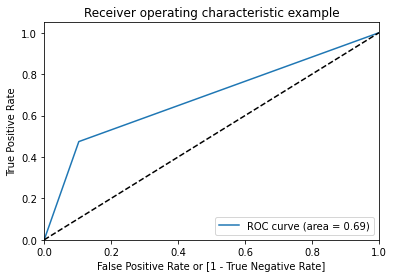

(array([0.        , 0.10340314, 1.        ]),
 array([0.       , 0.4742268, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [91]:
# Use above function to plot ROC curve

draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point'

<p style='text-align: right;'> 6 points</p>


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [92]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i] = y_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)

    
# print  y_pred_final head
y_pred_final.head()

,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.554340,1,1,1,1,1,1,1,0,0,0,0
1,3730,1,0.293748,0,1,1,1,0,0,0,0,0,0,0
2,1761,0,0.010005,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.727452,1,1,1,1,1,1,1,1,1,0,0
4,1872,0,0.011327,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [100]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i])
    
    #total in cm1
    total1 = sum(sum(cm1))
    
    #Calculate accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1]) 
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# print cutoff_df 
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  1.000000  0.000000
0.1   0.1  0.599526  0.951890  0.465314
0.2   0.2  0.686730  0.824742  0.634162
0.3   0.3  0.730806  0.735395  0.729058
0.4   0.4  0.772986  0.632302  0.826571
0.5   0.5  0.780095  0.474227  0.896597
0.6   0.6  0.784360  0.384880  0.936518
0.7   0.7  0.760190  0.180412  0.981021
0.8   0.8  0.724171  0.000000  1.000000
0.9   0.9  0.724171  0.000000  1.000000


<AxesSubplot:xlabel='prob'>

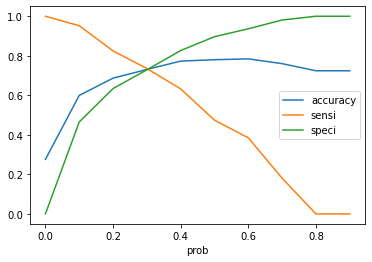

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

<p style='text-align: right;'> 4 points</p>


In [102]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability

y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)

In [104]:
# print y_pred_final head
y_pred_final.head()

,CustID,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.554340,1,1,1,1,1,1,1,0,0,0,0,1
1,3730,1,0.293748,0,1,1,1,0,0,0,0,0,0,0,0
2,1761,0,0.010005,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.727452,1,1,1,1,1,1,1,1,1,0,0,1
4,1872,0,0.011327,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
#Let's check the overall accuracy now again
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted) 

0.7308056872037915

In [106]:
#Let's check the overall accuracy now again
metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)

array([[1114,  414],
       [ 154,  428]], dtype=int64)

Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3. 


The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems. 


Lets try using all the features available before doing RFE. i.e consider all features in X




In [107]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)


In [108]:
#initialise Logistic Regression
logs2 = LogisticRegression()

#fitting model using above columns as input
logs2.fit(X, y)
#prediction on test data
y_pred= logs2.predict(X_test)

In [113]:
# print classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1528
           1       0.65      0.52      0.57       582

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [115]:
#print confusion metrix
metrics.confusion_matrix(y_test, y_pred)

array([[1364,  164],
       [ 281,  301]], dtype=int64)

So from above result we can see that our results are improved slightly after using all the features in X